# Знакомство с `torch.Tensor`

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы: 
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/torch.html


## Задачи для совместного разбора

In [2]:
import pandas as pd
import torch as th
import numpy as np
th.device("cuda" if th.cuda.is_available() else "cpu")

device(type='cuda')

1\. Создайте тензор и исследуйте его основные характеристики

In [3]:
t = th.rand(2,3,4)
t.shape, t.dtype 

(torch.Size([2, 3, 4]), torch.float32)

2\. Создайте трехмерный тензор и рассмотрите основные способы индексирования по нему

In [4]:
mask = [1,0,1]

t[:,mask]

tensor([[[0.8626, 0.2603, 0.7784, 0.8593],
         [0.2278, 0.1289, 0.5582, 0.7924],
         [0.8626, 0.2603, 0.7784, 0.8593]],

        [[0.6634, 0.2335, 0.3093, 0.4386],
         [0.1208, 0.3097, 0.1338, 0.5206],
         [0.6634, 0.2335, 0.3093, 0.4386]]])

In [5]:
t[0].shape

torch.Size([3, 4])

3\. Создайте тензор (4х4) и модифицируйте следующим образом: ко всем четным столбцам прибавьте 1, из нечетных вычтите 1.

In [6]:
t = th.rand(4,4)
display(t)

t[:,1::2] +=1
t[:,::2] -=1

t

tensor([[0.1260, 0.4704, 0.6464, 0.5141],
        [0.8197, 0.8678, 0.1763, 0.9075],
        [0.9848, 0.2567, 0.6352, 0.0492],
        [0.4068, 0.6956, 0.3575, 0.1531]])

tensor([[-0.8740,  1.4704, -0.3536,  1.5141],
        [-0.1803,  1.8678, -0.8237,  1.9075],
        [-0.0152,  1.2567, -0.3648,  1.0492],
        [-0.5932,  1.6956, -0.6425,  1.1531]])

4\. Обсудите совместимость `torch` с `numpy` и `sklearn`

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Создайте двумерный тензор размера (100000, 10), заполненный нулями. Используя прихотливое индексирование, поставьте в каждой строке тензора ровно одну единицу в случайно выбранном столбце. Рассчитайте и выведите на экран вероятности $p_i$ того, что для случайно выбранной строки в столбце $i$ будет стоять единица.

- [x] Проверено на семинаре

In [7]:
t = th.zeros([100000, 10], dtype=th.float32)
t[th.arange(100000),th.randint(0, 10, (100000,))] = 1
t.mean(0)

tensor([0.1013, 0.0991, 0.1004, 0.1005, 0.0994, 0.0991, 0.1001, 0.0992, 0.0999,
        0.1010])

<p class="task" id="2"></p>

2\. При помощи прихотливого индексирования для двумерного тензора размерности (10, 10), состоящего из случайных целых чисел в пределах от 0 до 10, получите тензор элементов, находящихся сразу над  побочной диагональю.

- [ ] Проверено на семинаре

In [8]:
t = th.randint(0,11,(10,10))
mask = np.bool([i[::-1] for i in np.vectorize(np.logical_xor)(np.triu(np.ones(t.shape),2),np.triu(np.ones(t.shape),1))])

display(t)
t[mask]

tensor([[ 8,  9,  4,  5,  6,  0,  7, 10,  5, 10],
        [ 7,  9,  1,  9,  2,  3,  6,  4,  7,  6],
        [ 7,  2,  5,  4,  4, 10,  1,  7,  6,  7],
        [ 6,  3,  6,  7,  1,  9,  3, 10,  7,  5],
        [ 4,  6,  4,  7,  7,  9, 10,  1,  1,  9],
        [ 9,  3,  8, 10,  6,  3,  3,  9,  2,  4],
        [ 5,  1,  6,  5,  7,  1,  0,  1,  8, 10],
        [ 7,  6, 10,  7,  1,  3,  8,  9,  8,  5],
        [ 6,  6,  9,  4, 10,  4,  4,  4,  7,  9],
        [10,  7,  5,  9,  8,  8,  8,  3,  1,  7]])

tensor([ 5,  4,  1,  9,  7, 10,  6,  6,  6])

<p class="task" id="3"></p>

3\. Создайте двумерный тензор $t$ размерности (5, 5), состоящий из случайных чисел в пределах от 0 до 100. Обнулите все значения в массиве, расположенные вне квадрата размера 3х3 вокруг максимального элемента. Если максимумов несколько, обнулите элементы около любого из них.

- [x] Проверено на семинаре

In [9]:
t = th.randint(0,101,(5,5))
row_max, col_max = th.unravel_index(th.argmax(t), t.shape)

row_start = max(0, row_max - 1)
row_end = min(5, row_max + 2)
col_start = max(0,col_max - 1)
col_end = min(5, col_max + 2)

mask = th.zeros_like(t, dtype=th.bool)
mask[row_start:row_end, col_start:col_end] = True

result = t.clone()
result[~mask] = 0

t, result

(tensor([[62, 62, 79, 93, 34],
         [91, 72, 33, 62, 52],
         [57, 17,  6, 10, 10],
         [78, 49, 92, 33, 62],
         [36, 77,  6, 59, 88]]),
 tensor([[ 0,  0, 79, 93, 34],
         [ 0,  0, 33, 62, 52],
         [ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0]]))

<p class="task" id="4"></p>

4\. Создайте трехмерный массив размерности (2, 5, 5) на основе решения задачи 3 (объедините исходный и результирущий тензор вдоль нулевой оси). Сохраните полученный трехмерный тензор в файл `tensor.pt`. Загрузите полученный тензор и покажите, что все элементы двух тензоров совпадают.

- [x] Проверено на семинаре

In [10]:
t_u = th.stack([t, result], dim=0)
display(t_u)
th.save(t_u, 'tensor.pt')

load_t=th.load('tensor.pt')
display(load_t)
th.all(t_u == load_t)

tensor([[[62, 62, 79, 93, 34],
         [91, 72, 33, 62, 52],
         [57, 17,  6, 10, 10],
         [78, 49, 92, 33, 62],
         [36, 77,  6, 59, 88]],

        [[ 0,  0, 79, 93, 34],
         [ 0,  0, 33, 62, 52],
         [ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0]]])

tensor([[[62, 62, 79, 93, 34],
         [91, 72, 33, 62, 52],
         [57, 17,  6, 10, 10],
         [78, 49, 92, 33, 62],
         [36, 77,  6, 59, 88]],

        [[ 0,  0, 79, 93, 34],
         [ 0,  0, 33, 62, 52],
         [ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0]]])

tensor(True)

<p class="task" id="5"></p>

5\. Создайте четырехмерный массив `t` размерности (2, 3, 5, 5), заполненный случайными целыми числами от 1 до 10 (сами значения должны быть представлены типом float32). Рассчитайте среднее значение для каждого двумерного тензора `t[i, j, :, :]`. Представьте результат в виде трехмерного тензора размера (2, 3, 1).

- [x] Проверено на семинаре

In [11]:
t5 = th.randint(1,11,(2, 3, 5, 5), dtype=th.float32)
t5.mean(dim=(3,2), keepdim=False).reshape(2,3,1)

tensor([[[6.5600],
         [5.4800],
         [6.2000]],

        [[4.9600],
         [4.5600],
         [5.9600]]])

<p class="task" id="6"></p>

6\. Создайте одномерный тензор размера `N=100_000_000`, заполненный числами из экспоненциального распредления с параметром $\lambda=5$. Рассчитайте значения для построения гистограммы при помощи пакета `torch`. Визуализируйте гистограмму. Проверьте возможность использования GPU. При наличии GPU перенесите созданный тензор в память GPU, повторите вычисления. Сравните время расчетом с и без использования GPU.

- [x] Проверено на семинаре

end_cpu=1.8526055812835693 sec


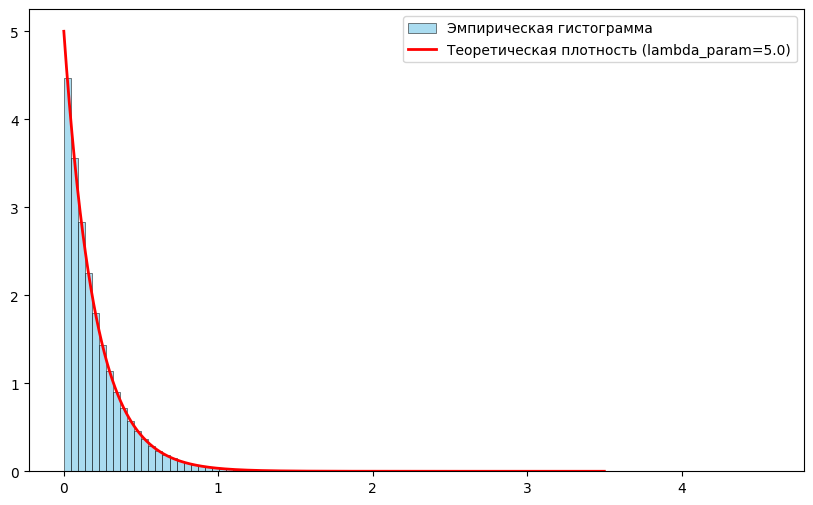

Cuda available!
end_gpu=0.24658203125 sec


In [12]:
import matplotlib.pyplot as plt
import time
N=100_000_000
lambda_param = 5.0

start_cpu = time.time()
exponential_dist = th.distributions.Exponential(th.tensor(lambda_param))
sample_tensor = exponential_dist.sample([N])
end_cpu = time.time() - start_cpu

print(f'{end_cpu=} sec')

plt.figure(figsize=(10, 6))
plt.hist(sample_tensor.numpy(), bins=100, density=True, alpha=0.7, color='skyblue', edgecolor='black', linewidth=0.5, label='Эмпирическая гистограмма')
x = np.linspace(0, 3.5, 1000)
y = lambda_param * np.exp(-lambda_param * x)
plt.plot(x, y, 'r-', linewidth=2, label=f'Теоретическая плотность ({lambda_param=})')
plt.legend()
plt.show()



if th.cuda.is_available():
    print('Cuda available!')
    start_gpu = time.time()
    exponential_dist = th.distributions.Exponential(th.tensor(lambda_param, device='cuda'))
    sample_tensor = exponential_dist.sample([N])
    end_gpu = time.time() - start_gpu

    print(f'{end_gpu=} sec')

<p class="task" id="7"></p>

7\. Создайте четырехмерный тензор размера (10, 6, 6, 3), заполненный случайными целыми числами от 0 до 255. Считая, что данный тензор представляет собой батч из 10 картинок размера 6х6 в формате RGB, измените тензор следующим образом. Для оттенков красного обнулите все столбцы, кроме первых двух; для оттенков зеленого обнулите третий и четвертый столбцы; для оттенков синего обнулите пятый и шестой столбцы. Для выполнения задания используйте механизм распространения.

- [ ] Проверено на семинаре

In [13]:
t = th.randint(0,256,(10, 6, 6, 3))
t[:, :, :, 0][:,:,:2] =0
t[:, :, :, 1][:,:,[2,3]] =0
t[:, :, :, 2][:,:,[4,5]] =0

t

tensor([[[[  0, 149, 214],
          [  0, 181,   8],
          [ 31,   0, 167],
          [149,   0,  91],
          [ 67,  83,   0],
          [142, 209,   0]],

         [[  0,  56, 242],
          [  0, 198, 150],
          [  3,   0, 184],
          [106,   0, 108],
          [183, 181,   0],
          [ 78,  14,   0]],

         [[  0,  88, 133],
          [  0,  79, 187],
          [ 74,   0, 255],
          [ 59,   0, 145],
          [  1,  42,   0],
          [ 29, 150,   0]],

         [[  0, 204, 128],
          [  0, 165,  14],
          [ 22,   0, 164],
          [104,   0,   6],
          [ 61, 154,   0],
          [ 56, 211,   0]],

         [[  0, 223, 108],
          [  0,  24, 240],
          [ 29,   0, 246],
          [147,   0, 121],
          [ 34,  17,   0],
          [216, 217,   0]],

         [[  0, 142, 123],
          [  0, 172,  25],
          [ 99,   0,  75],
          [220,   0, 143],
          [234, 143,   0],
          [ 85, 156,   0]]],


        [[[  0

In [14]:
# Но выше было решение не через broadcasting

m = th.zeros(6)
m

tensor([0., 0., 0., 0., 0., 0.])